In [1]:
import tensorflow as tf
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from math import pow
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_train = X_train.reshape(len(X_train), -1)
y_train = y_train.reshape(len(y_train))

X_test = X_test.reshape(len(X_test), -1)
y_test = y_test.reshape(len(y_test))

X_train, y_train = resample(X_train, y_train, random_state=0, n_samples=5000)
X_test, y_test = resample(X_test, y_test, random_state=0, n_samples=1000)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5000, 784), (5000,), (1000, 784), (1000,))

In [3]:
svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [4]:
y_pred = svc.predict(X_test)
accuracy_score(y_test, y_pred)

0.958

In [6]:
def cs():
    for e in range(-3, 3+1):
        for b in 1, 2, 3, 5, 8:
            yield b * pow(10, e)
    yield 10000

In [7]:
list(cs())

[0.001,
 0.002,
 0.003,
 0.005,
 0.008,
 0.01,
 0.02,
 0.03,
 0.05,
 0.08,
 0.1,
 0.2,
 0.30000000000000004,
 0.5,
 0.8,
 1.0,
 2.0,
 3.0,
 5.0,
 8.0,
 10.0,
 20.0,
 30.0,
 50.0,
 80.0,
 100.0,
 200.0,
 300.0,
 500.0,
 800.0,
 1000.0,
 2000.0,
 3000.0,
 5000.0,
 8000.0,
 10000]

In [8]:
def gen():
    for C in cs():
        for kernel in 'linear', 'poly', 'rbf', 'sigmoid':
            svc = SVC(C=C, kernel=kernel)
            svc.fit(X_train, y_train)  
            y_pred = svc.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            print(C, kernel, accuracy)
            yield C, kernel, accuracy
            
results = pd.DataFrame(gen(), columns=['C', 'kernel', 'accuracy'])
results.to_csv('mnist/csv/2_svm.csv')

0.001 linear 0.917
0.001 poly 0.121
0.001 rbf 0.109
0.001 sigmoid 0.109
0.002 linear 0.917
0.002 poly 0.173
0.002 rbf 0.109
0.002 sigmoid 0.109
0.003 linear 0.917
0.003 poly 0.239
0.003 rbf 0.114
0.003 sigmoid 0.129
0.005 linear 0.917
0.005 poly 0.364
0.005 rbf 0.24
0.005 sigmoid 0.248
0.008 linear 0.917
0.008 poly 0.501
0.008 rbf 0.418
0.008 sigmoid 0.422
0.01 linear 0.917
0.01 poly 0.578
0.01 rbf 0.529
0.01 sigmoid 0.527
0.02 linear 0.917
0.02 poly 0.729
0.02 rbf 0.793
0.02 sigmoid 0.753
0.03 linear 0.917
0.03 poly 0.776
0.03 rbf 0.867
0.03 sigmoid 0.831
0.05 linear 0.917
0.05 poly 0.843
0.05 rbf 0.893
0.05 sigmoid 0.858
0.08 linear 0.917
0.08 poly 0.872
0.08 rbf 0.904
0.08 sigmoid 0.869
0.1 linear 0.917
0.1 poly 0.882
0.1 rbf 0.914
0.1 sigmoid 0.87
0.2 linear 0.917
0.2 poly 0.911
0.2 rbf 0.93
0.2 sigmoid 0.876
0.30000000000000004 linear 0.917
0.30000000000000004 poly 0.923
0.30000000000000004 rbf 0.933
0.30000000000000004 sigmoid 0.88
0.5 linear 0.917
0.5 poly 0.931
0.5 rbf 0.943
0.

In [31]:
results = pd.read_csv('mnist/csv/2_svm.csv')

In [32]:
results.sort_values(by='accuracy', ascending=False)

,Unnamed: 0,C,kernel,accuracy
70,70,3.000,rbf,0.964
66,66,2.000,rbf,0.963
74,74,5.000,rbf,0.962
122,122,1000.000,rbf,0.961
82,82,10.000,rbf,0.961
...,...,...,...,...
10,10,0.003,rbf,0.114
7,7,0.002,sigmoid,0.109
6,6,0.002,rbf,0.109
3,3,0.001,sigmoid,0.109


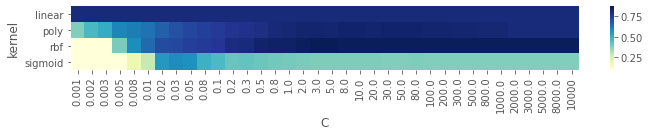

In [30]:
data = results.pivot('kernel', 'C', 'accuracy')
cmap = sns.diverging_palette(10, 220, sep=80, n=10000)
fig, ax = plt.subplots(figsize=(10, 2))
sns.heatmap(data, cmap='YlGnBu', ax=ax)
ax.set(xticklabels=[str(round(c, 3)) for c in cs()])
plt.subplots_adjust(bottom=0.5)
fig.tight_layout()
fig.savefig('mnist/plots/svm_heatmap.png', dpi=600)